# Task 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
# a) load the data
files = ["https://cvml.ista.ac.at/courses/ModernML_F24/Ytrain.txt", "https://cvml.ista.ac.at/courses/ModernML_F24/XtrainIMG.txt"]
for f in files:
    ! wget -q {f}

In [51]:
Y = pd.read_csv("Ytrain.txt", header=None)
X = pd.read_csv("XtrainIMG.txt", delimiter=" ", header=None)
X.head()
# Y.head()

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,574,575
0,0.45490,0.45882,0.46275,0.46275,0.46275,0.46667,0.47451,0.48627,0.51765,0.52941,...,0.61176,0.61176,0.61961,0.61961,0.61961,0.62353,0.62353,0.62353,0.62745,0.62745
1,0.48627,0.36863,0.27843,0.30588,0.40000,0.49412,0.58431,0.65098,0.70588,0.71765,...,0.74118,0.74902,0.74510,0.74118,0.73725,0.72549,0.71765,0.70980,0.70196,0.69804
2,0.25490,0.21961,0.19216,0.19216,0.20392,0.21176,0.22353,0.24314,0.27843,0.29804,...,0.47843,0.47843,0.48627,0.49804,0.51373,0.52157,0.52157,0.52157,0.52549,0.53333
3,0.50588,0.50980,0.51765,0.52157,0.51373,0.50196,0.49020,0.48235,0.43529,0.42745,...,0.44314,0.44706,0.45490,0.44706,0.43529,0.41569,0.38431,0.32941,0.26275,0.21569
4,0.57647,0.55294,0.51765,0.47843,0.43922,0.39608,0.35294,0.32157,0.27059,0.23529,...,0.44314,0.45098,0.45490,0.45490,0.45098,0.43922,0.42353,0.40784,0.40000,0.39608


In [50]:
# split the data into training and eval sets
def split_data_randomly(X, Y, train_ratio=0.5, seed=0):
    np.random.seed(seed)
    n = X.shape[0]
    n_train = int(n * train_ratio)
    idx = np.random.permutation(n)
    idx_train = idx[:n_train]
    idx_eval = idx[n_train:]
    X_train = X.iloc[idx_train].values
    Y_train = Y.iloc[idx_train].values
    X_eval = X.iloc[idx_eval].values
    Y_eval = Y.iloc[idx_eval].values
    return X_train, Y_train, X_eval, Y_eval

X_train, Y_train, X_eval, Y_eval = split_data_randomly(X, Y)
print(X_train.shape, Y_train.shape, X_eval.shape, Y_eval.shape)

(606, 576) (606, 1) (607, 576) (607, 1)


In [52]:
# c) train a least squares classifier for all l in 2**[-15, ..., 15]
errs_train = []
errs_eval = []

for l in range(-15, 16, 1):
    w = np.linalg.inv(X_train.T @ X_train + 2**l * np.eye(X_train.shape[1])) @ X_train.T @ Y_train
    Y_train_pred = np.sign(X_train @ w)
    err_train = 1- np.mean(Y_train_pred == Y_train)
    errs_train.append(err_train)
    Y_eval_pred = np.sign(X_eval @ w)
    err_eval = 1 - np.mean(Y_eval_pred == Y_eval)
    errs_eval.append(err_eval)

print(min(errs_eval), errs_eval.index(min(errs_eval)), range(-15, 16, 1)[errs_eval.index(min(errs_eval))])

0.09060955518945635 18 3


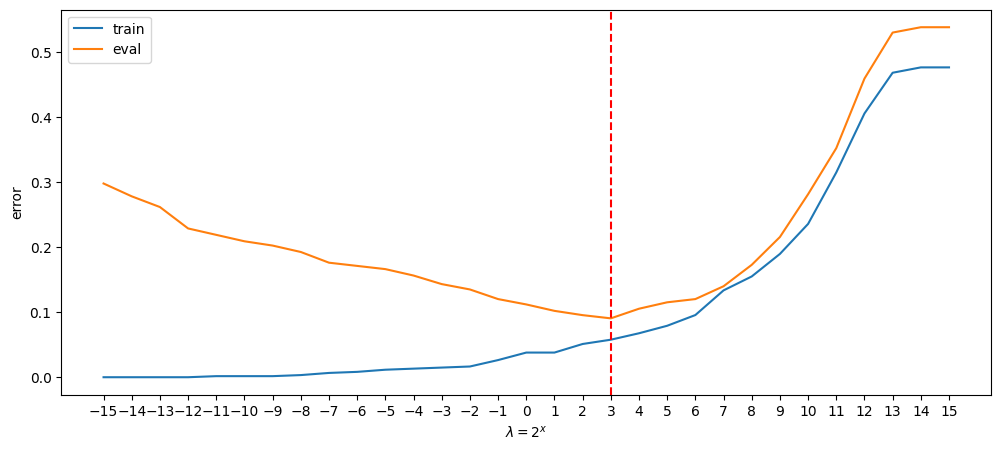

In [53]:
# d) plot the accuracy on the train and eval
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=range(-15, 16, 1), y=errs_train, label="train", ax=ax)
sns.lineplot(x=range(-15, 16, 1), y=errs_eval, label="eval", ax=ax)
plt.xticks(range(-15, 16, 1))
plt.xlabel("$\lambda = 2^x$")
plt.ylabel("error")
plt.axvline(range(-15, 16, 1)[errs_eval.index(min(errs_eval))], color="red", linestyle="--")

e) Overfitting for $\lambda \in 2^{[-15,...,3)}$ – eval error is much bigger then train error

Underfitting for $\lambda \in 2^{(3,...,15]}$ – eval error is approximately same as train error, and bot are very big

# Task 7

In [45]:
# a) do same as for least squares classifier

errs_train = []
errs_eval = []

Y_train_1d = Y_train.ravel()
Y_eval_1d = Y_eval.ravel()

for l in range(-15, 16, 1):
    lr = LogisticRegression(penalty="l2", C=1/(2**l), max_iter=1000).fit(X_train, Y_train_1d)
    err_train = 1 - lr.score(X_train, Y_train_1d)
    err_eval = 1 - lr.score(X_eval, Y_eval_1d)
    errs_train.append(err_train)
    errs_eval.append(err_eval)
    
print(min(errs_eval), errs_eval.index(min(errs_eval)), range(-15, 16, 1)[errs_eval.index(min(errs_eval))])

0.0988467874794069 14 -1


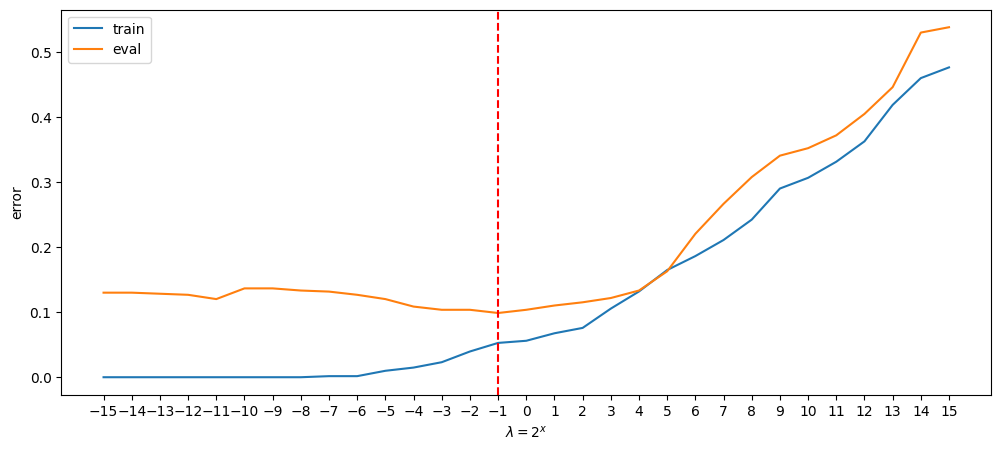

In [47]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=range(-15, 16, 1), y=errs_train, label="train", ax=ax)
sns.lineplot(x=range(-15, 16, 1), y=errs_eval, label="eval", ax=ax)
plt.xticks(range(-15, 16, 1))
plt.xlabel("$\lambda = 2^x$")
plt.ylabel("error")
plt.axvline(range(-15, 16, 1)[errs_eval.index(min(errs_eval))], color="red", linestyle="--")

b) Logistic regression overfitts less then least squares classifier, and so  